# Analysis and Visualization of the English Wikipedia's Views

## Overview

### This notebook contains the step by step code and related documentation to visualize the monthly desktop and mobile traffic on the English wikipedia

First we need to import the required libraries or modules that will be needed to run the code in this notebook. 

In [1]:
#pandas is a super useful python library that has many valueable data storage and manipulation functions. 
import pandas as pd

#Periodically we would need a way to check the intermediate results. We do that by printing the values of the variables.
#This is done using the display module from the IPython.core.display library.
from IPython.core.display import display

#a good plotting library for python
import matplotlib.pyplot as plt

#YearLocator and DateFormatter are used for formatting options of the x-axis which contains year and month
from matplotlib.dates import YearLocator, DateFormatter

And then create and initialize some variables that can make the code easy to maintain, as well as set global level options to make the output more readable.

In [2]:
#Directory where the processed file exists
processed_data_dir = './data/processed/'

#Variable that holds the file name of the processed data file
processedfilename = 'en-wikipedia_traffic_200801-201709.csv'

#Directory where the visualization file will be saved
visualization_data_dir = './data/visualization/'

#Variable that holds the file name of the visualization image
visualizationfilename = 'en-wikipedia_traffic_200801-201709.jpg'

#preventing scientific notation of numbers in the results of executions in this notebook, for readability
pd.set_option('precision',2)

Now we read the processed data into a variable so we can do the plotting in the next step. Note, to help in the formatting of the x-axis in the visualization, we are adding an index with the following date format YYYYMM.

In [3]:
#Read the processed data into a pandas dataframe
wikipediatrafficdata = pd.read_csv(processed_data_dir+processedfilename)

#create a new variable to be used as an index by joining the year and month fields into YYYYMM format and using for index data
indexdata=  [(str(wikipediatrafficdata.iloc[i]['year'])
            +('0' if wikipediatrafficdata.iloc[i]['month']<10 else '')
            +str(wikipediatrafficdata.iloc[i]['month'])) for i in range(0,len(wikipediatrafficdata))]

#set the index to the dataframe using the variable from the above step
wikipediatrafficdata = wikipediatrafficdata.set_index([indexdata])

#optionally, display the data contained in the dataframe before the final visualization step.
display(wikipediatrafficdata)

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
200807,2008,7,5306302874,5306302874,0,0,0,0
200808,2008,8,5140155519,5140155519,0,0,0,0
200809,2008,9,5479533823,5479533823,0,0,0,0
200810,2008,10,5679440782,5679440782,0,0,0,0
200811,2008,11,5415832071,5415832071,0,0,0,0
200812,2008,12,5211708451,5211708451,0,0,0,0
200901,2009,1,5802681551,5802681551,0,0,0,0
200902,2009,2,5547320860,5547320860,0,0,0,0
200903,2009,3,6295159057,6295159057,0,0,0,0
200904,2009,4,5988817321,5988817321,0,0,0,0


Now that we have all the required data, we can start the visualization process. We do the visualization chart by using matplotlib library and set a bunch of formatting options to make the visual appear as desired and create a plot object containing the data and the formatting. 

In [4]:
#get a handle for the figure and axis
fig, ax = plt.subplots()

#set the scientific formatter of the y-axis to false, so that the numbers can be shown in non-scientific format
ax.get_yaxis().get_major_formatter().set_scientific(False)

#variable to hold the format of the Date to be displayed on the x-axis ticks.
monthsFmt = DateFormatter("%Y")

#get the list of year-month combinations from the index we created earlier
#and create a new variable that contains the first date of each month for all of these combinations
#these dates will be used as the data for plotting the x-axis in next step
monthslist = wikipediatrafficdata.index.tolist()
dates = [(monthslist[i][0:4]+ '-'+ monthslist[i][4:6]+'-01') for i in range(0,len(monthslist))]

#add the pagecount_all_views vs dates to the plot. 
#Note the y-axis numbers are divided by 1,000,000 to display in millions (for readability)
#Add the line format, label and color options
ax.plot_date(dates,wikipediatrafficdata['pagecount_all_views']/1000000,'-',label='total',color='k')

#add the pagecount_desktop_views vs dates to the plot. And format as mentioned in previous step
ax.plot_date(dates,wikipediatrafficdata['pagecount_desktop_views']/1000000,'-',label='main site',color='g')

#add the pagecount_mobile_views vs dates to the plot. And format as mentioned in previous step
ax.plot_date(dates,wikipediatrafficdata['pagecount_mobile_views']/1000000,'-',label='mobile site',color='b')

#add the pageview_all_views vs dates to the plot. And format as mentioned in previous step 
ax.plot_date(dates,wikipediatrafficdata['pageview_all_views']/1000000,'-',label='total',color='k')

#add the pageview_desktop_views vs dates to the plot. And format as mentioned in previous step 
ax.plot_date(dates,wikipediatrafficdata['pageview_desktop_views']/1000000,'-',label='main site',color='g')

#add the pageview_mobile_views vs dates to the plot. And format as mentioned in previous step 
ax.plot_date(dates,wikipediatrafficdata['pageview_mobile_views']/1000000,'-',label='mobile site',color='b')

#set the y-axis to start with zero
ax.set_ylim(ymin=0)

#show gridlines and format the linewidth and color
ax.xaxis.grid(linewidth=0.75,color='k')
ax.yaxis.grid(linewidth=0.5,color='tab:gray')

#get the handles for the labels and modify to eliminate duplicates.
handles, labels = ax.get_legend_handles_labels()
labels = set(labels)

#set the titles for the axes and the plot
plt.xlabel('year')
plt.ylabel('number of views')
plt.title('Page Views on English Wikipedia (x 1,000,000)')

#add the legend to the plot
plt.legend(handles,labels)

In [5]:
#save the plot to a file for offline access.
plt.savefig(visualization_data_dir+visualizationfilename)

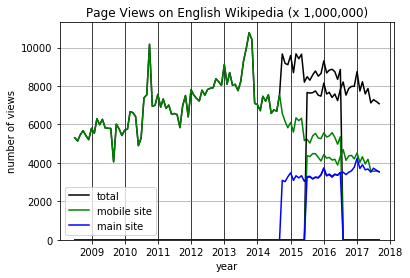

In [6]:
#display the plot
plt.show()

We see in the above visual the timeseries of the page views of the English wikipedia page in the desktop, mobile platforms and both the platforms together.